In [1]:
!pip install pandas

  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl (44.8 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [59]:
df=pd.read_csv(r'C:\Users\shali\Downloads\Dataset-SA.csv')

In [60]:
print(df.head())

                                        product_name  ... Sentiment
0  Candes 12 L Room/Personal Air Cooler??????(Whi...  ...  positive
1  Candes 12 L Room/Personal Air Cooler??????(Whi...  ...  positive
2  Candes 12 L Room/Personal Air Cooler??????(Whi...  ...  positive
3  Candes 12 L Room/Personal Air Cooler??????(Whi...  ...  negative
4  Candes 12 L Room/Personal Air Cooler??????(Whi...  ...   neutral

[5 rows x 6 columns]


In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
texts = df['Review'].values  
labels = df['Sentiment'].values  

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


In [65]:
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [66]:
print(train_texts[:10])  
print(type(train_texts))  
print(type(train_texts[0]))

['wonderful' 'wonderful' 'slightly disappointed' 'mind-blowing purchase'
 'nice product' 'fabulous!' 'worth the money' 'useless product'
 'expected a better product' 'terrible product']
<class 'numpy.ndarray'>
<class 'str'>


In [67]:
import numpy as np
train_texts = np.array([str(text) if pd.notna(text) else '' for text in train_texts])
print(train_texts[:10]) 

['wonderful' 'wonderful' 'slightly disappointed' 'mind-blowing purchase'
 'nice product' 'fabulous!' 'worth the money' 'useless product'
 'expected a better product' 'terrible product']


In [68]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts) 

In [69]:
train_texts = [str(text) for text in train_texts]
val_texts = [str(text) for text in val_texts]
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

In [70]:
max_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')


In [71]:
import tensorflow as tf


In [72]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=3)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=3)

In [73]:
from tensorflow.keras import layers, models

In [74]:
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax') 
])

c:\Shalinii\Sentiment analysis\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [75]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
history = model.fit(train_padded, train_labels, 
                    validation_data=(val_padded, val_labels),
                    epochs=10,  
                    batch_size=32) 

Epoch 1/10
5127/5127 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.8842 - loss: 0.3839 - val_accuracy: 0.8997 - val_loss: 0.3498
Epoch 2/10
5127/5127 ━━━━━━━━━━━━━━━━━━━━ 62s 12ms/step - accuracy: 0.8970 - loss: 0.3467 - val_accuracy: 0.8997 - val_loss: 0.3440
Epoch 3/10
5127/5127 ━━━━━━━━━━━━━━━━━━━━ 48s 9ms/step - accuracy: 0.8962 - loss: 0.3470 - val_accuracy: 0.8996 - val_loss: 0.3412
Epoch 4/10
5127/5127 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.8986 - loss: 0.3418 - val_accuracy: 0.8997 - val_loss: 0.3408
Epoch 5/10
5127/5127 ━━━━━━━━━━━━━━━━━━━━ 63s 12ms/step - accuracy: 0.8982 - loss: 0.3415 - val_accuracy: 0.8998 - val_loss: 0.3431
Epoch 6/10
5127/5127 ━━━━━━━━━━━━━━━━━━━━ 106s 21ms/step - accuracy: 0.8964 - loss: 0.3458 - val_accuracy: 0.8997 - val_loss: 0.3424
Epoch 7/10
5127/5127 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.8982 - loss: 0.3411 - val_accuracy: 0.8996 - val_loss: 0.3481
Epoch 8/10
5127/5127 ━━━━━━━━━━━━━━━━━━━━ 55s 11ms/step - accuracy: 0.8980 - lo

In [78]:
val_loss, val_accuracy = model.evaluate(val_padded, val_labels)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

1282/1282 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8978 - loss: 0.3478
Validation Accuracy: 89.97%


In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
epochs = np.arange(len(history.history['accuracy']))

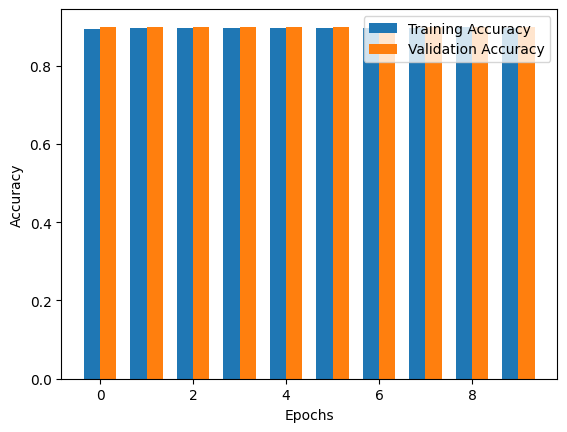

In [82]:
width = 0.35  
plt.bar(epochs - width/2, history.history['accuracy'], width=width, label='Training Accuracy')
plt.bar(epochs + width/2, history.history['val_accuracy'], width=width, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

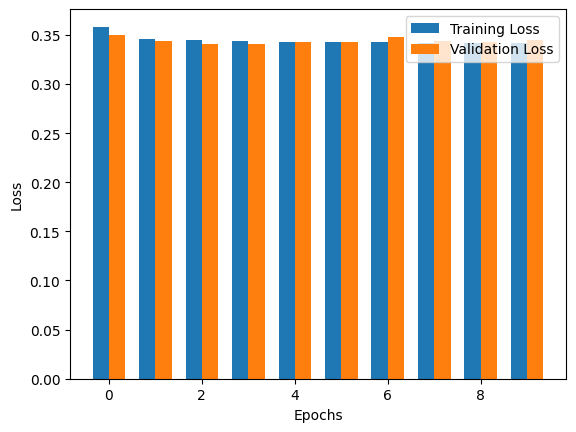

In [83]:
plt.bar(epochs - width/2, history.history['loss'], width=width, label='Training Loss')
plt.bar(epochs + width/2, history.history['val_loss'], width=width, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [84]:

new_text = ["This product is fantastic!"]

new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post', truncating='post')


prediction = model.predict(new_padded)
predicted_label = label_encoder.inverse_transform([prediction.argmax(axis=-1)[0]])

print(f"Predicted Sentiment: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Sentiment: positive
